# Table of Content <a id='toc'></a>

[1. Reading the data](#0)

[2. data manipulation](#1)

&nbsp;&nbsp;&nbsp;&nbsp;[2.1 first contact with the data](#2)

&nbsp;&nbsp;&nbsp;&nbsp;[2.2 accessing specific parts of the data](#3)

&nbsp;&nbsp;&nbsp;&nbsp;[2.3 adding and combining columns](#4)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 01 - data manipulation](#5)

[3. data description and representation](#6)

&nbsp;&nbsp;&nbsp;&nbsp;[3.1 basic description - common summary statistics](#7)

&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Representing one column - histograms and density line](#8)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 02 - histograms](#9)

&nbsp;&nbsp;&nbsp;&nbsp;[3.3 accounting for categories in the data](#10)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.1 Boxplots](#11)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.2 violin-plots](#12)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.3 barplots and their error bars](#13)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.4 showing several categorizations at the same time](#14)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 03 - representing categories](#15)

[4 Additional types of plots and some *caveat* about graphical representations](#16)

# importing, manipulating, and representing data 

The basis of any statistical analysis is the underlying data.

A data-set is typically presented as a file containing information formatted as a table:
 * each line correspond to an observation ( individual, sample, ... )
 * each column correspond to a measured variable ( height, sex, gene expression, ... )


To read data file and manipulate the data, we will rely on [pandas](https://pandas.pydata.org/)
Pandas is a "high-level" module, designed for statistics/exploratory analysis.
A great strength of pandas is its **DataFrame** which emulates many of the convenient behavior and syntax of their eponym counterpart in the **R** language.


To graphically represent the data, we will rely on [seaborn](https://seaborn.pydata.org/index.html).
Seaborn is designed to work hand-in-hand with pandas DataDrame to produce **efficient data representation** from fairly simple commands. They propose very good tutorials as well as a gallery (with associated code) that can get you started quickly.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('OK')

### This is some configuration to make the plots work better when presenting online
%matplotlib inline

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10
plt.rc("font", size=16)


OK



[back to the toc](#toc)

<br>

## 1. Reading the data <a id='0'></a>

what is the file name? location?
what is the saprator between fields??


`pd.read_table` is a generalistic function to read table. Aside from the name of the file to read, here are some useful parameters:
* `sep` : separator between columns (by default '\t')
* `header` : Row number(s) to use as the column names. By default it will use the first line as a header. use `header=None` if the file does not contain column name.
* `skiprows` : Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file.
* (`true_values`/`false_values` can also be useful)

Of course you can learn (much) more using `help(pd.read_table)`.




The data we will be playing with is census data of the swiss population for the year 1880 [source](https://www.bfs.admin.ch/bfs/en/home/statistics/population/surveys/census.assetdetail.11047857.html).
The data-file is named `"swiss_census_1880.csv"` and like its extension suggests, it contains **C**omma-**S**eparated **V**alues.


In [2]:
import pandas as pd

df = pd.read_table("data/swiss_census_1880.csv" , sep=',') 
#try to see what happens when sep has a different value

df.head() # this returns the 5 first lines of the table

,Year,town number,town name,Total,Swiss,Foreigner,Male,Female,0-14 y.o.,15-59 y.o.,...,German speakers,French speakers,Italian speakers,Romansche speakers,Non-national tongue speakers,district number,district name,canton number,canton,canton name
0,1880,1,Aeugst,646,627,19,319,327,217,379,...,645,0,1,0,0,101,Affoltern,1,ZH,Zürich
1,1880,2,Affoltern am Albis,2201,2088,113,1055,1146,713,1331,...,2193,5,3,0,0,101,Affoltern,1,ZH,Zürich
2,1880,3,Bonstetten,771,754,17,361,410,266,449,...,771,0,0,0,0,101,Affoltern,1,ZH,Zürich
3,1880,4,Hausen,1363,1305,58,640,723,343,884,...,1342,12,9,0,0,101,Affoltern,1,ZH,Zürich
4,1880,5,Hedingen,907,867,40,448,459,255,567,...,893,0,9,0,5,101,Affoltern,1,ZH,Zürich



[back to the toc](#toc)

<br>

## 2. data manipulation <a id='1'></a>


[back to the toc](#toc)

<br>

### 2.1 first contact with the data <a id='2'></a>

Gathering basic information about the data-set is fairly easy :

In [3]:
numberRows , numberCols = df.shape
print('rows:',numberRows , 'columns:',numberCols)
print('column names')
df.columns

rows: 3190 columns: 24
column names


Index(['Year', 'town number', 'town name', 'Total', 'Swiss', 'Foreigner',
       'Male', 'Female', '0-14 y.o.', '15-59 y.o.', '60+ y.o.', 'Reformed',
       'Catholic', 'Other', 'German speakers', 'French speakers',
       'Italian speakers', 'Romansche speakers',
       'Non-national tongue speakers', 'district number', 'district name',
       'canton number', 'canton', 'canton name'],
      dtype='object')

In [4]:
print( "columns types:\n" ,df.dtypes )# lists the types

columns types:
 Year                             int64
town number                      int64
town name                       object
Total                            int64
Swiss                            int64
Foreigner                        int64
Male                             int64
Female                           int64
0-14 y.o.                        int64
15-59 y.o.                       int64
60+ y.o.                         int64
Reformed                         int64
Catholic                         int64
Other                            int64
German speakers                  int64
French speakers                  int64
Italian speakers                 int64
Romansche speakers               int64
Non-national tongue speakers     int64
district number                  int64
district name                   object
canton number                    int64
canton                          object
canton name                     object
dtype: object


Here we can see that most values are integers, save for names (town names, canton, ...).


[back to the toc](#toc)

<br>

### 2.2 accessing specific parts of the data <a id='3'></a>

One can access a column just by using `df[<column name>]` :

In [5]:
df['Foreigner']

0         19
1        113
2         17
3         58
4         40
        ... 
3185     171
3186     145
3187     352
3188    3031
3189    3821
Name: Foreigner, Length: 3190, dtype: int64

To access a **specific section of the data, use the `.loc[ : , : ]` operator.**
It takes two slicing arguments thatt, respectively, targets rows and columns. A `:` selects all elements.

In [6]:
df.loc[ 0:3 , : ] ### first 4 rows, all columns

,Year,town number,town name,Total,Swiss,Foreigner,Male,Female,0-14 y.o.,15-59 y.o.,...,German speakers,French speakers,Italian speakers,Romansche speakers,Non-national tongue speakers,district number,district name,canton number,canton,canton name
0,1880,1,Aeugst,646,627,19,319,327,217,379,...,645,0,1,0,0,101,Affoltern,1,ZH,Zürich
1,1880,2,Affoltern am Albis,2201,2088,113,1055,1146,713,1331,...,2193,5,3,0,0,101,Affoltern,1,ZH,Zürich
2,1880,3,Bonstetten,771,754,17,361,410,266,449,...,771,0,0,0,0,101,Affoltern,1,ZH,Zürich
3,1880,4,Hausen,1363,1305,58,640,723,343,884,...,1342,12,9,0,0,101,Affoltern,1,ZH,Zürich


In [7]:
df.loc[ 0:3 , [ 'Total' , 'town name' ] ] ### first 4 rows, columns 'town name' and 'Total'

,Total,town name
0,646,Aeugst
1,2201,Affoltern am Albis
2,771,Bonstetten
3,1363,Hausen


In [8]:
df.loc[ : , 'Total' ] ### all rows, column 'Total'

0         646
1        2201
2         771
3        1363
4         907
        ...  
3185      342
3186      584
3187      703
3188     7365
3189    10912
Name: Total, Length: 3190, dtype: int64

> There also exists the `.iloc[ : , : ]` operator to select columns (and rows) by index instead of names. See this [pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for more details and recipes.


Another, powerful, way of accessing specific part of the data is by defining a mask, which will **filter the data through a particular condition**.


In [9]:
maskVD = df.loc[ : , 'canton' ] == 'VD'  # df['canton']
maskVD.value_counts()

False    2802
True      388
Name: canton, dtype: int64

The mask (in fact a `pandas.core.series.Series`), is in effect a list of values that are ```True``` or `False` depending on whether or not they satisfy the defined condition (canton is equal to 'VD', here).

The mask can then be applied to the `DataFrame`.

In [10]:
df.loc[ maskVD  , ['town name','canton','canton name'] ]

,town name,canton,canton name
2522,Aigle,VD,Vaud
2523,Bex,VD,Vaud
2524,Chessel,VD,Vaud
2525,Corbeyrier,VD,Vaud
2526,Gryon,VD,Vaud
...,...,...,...
2905,Villars-Epeney,VD,Vaud
2906,Villars-sous-Champvent,VD,Vaud
2907,Vugelles-La Mothe,VD,Vaud
2908,Yverdon,VD,Vaud


Masks may be combined to produce more complex selection criteria, using **`&`** (logical and) and **`|`** (logical or).

In [11]:
# towns in the canton of Zurich and with more than 10 000 registered inhabitant
mask = (df.loc[ : , 'canton' ] == 'ZH') & ( df.loc[ : , 'Total' ] >= 10000  ) 

df.loc[ mask , ]

,Year,town number,town name,Total,Swiss,Foreigner,Male,Female,0-14 y.o.,15-59 y.o.,...,German speakers,French speakers,Italian speakers,Romansche speakers,Non-national tongue speakers,district number,district name,canton number,canton,canton name
159,1880,230,Winterthur,13595,11590,2005,6501,7094,3903,8923,...,13303,136,91,20,45,110,Winterthur,1,ZH,Zürich
178,1880,253,Zürich,25102,19501,5601,11559,13543,5243,18230,...,24412,370,137,24,159,111,Zürich,1,ZH,Zürich
189,1880,110120,Aussersihl,14186,11053,3133,7088,7098,4485,9157,...,13767,156,234,9,20,111,Zürich,1,ZH,Zürich


**micro-exercise :** Select towns with less than 1000 inhabitants (column `Total`), (*optional*: display only town name and number of inhabitants)


[back to the toc](#toc)

<br>

### 2.3 adding and combining columns <a id='4'></a>

New columns are easy to create from existing ones :

In [12]:
df['14+ y.o.'] = df['15-59 y.o.'] + df['60+ y.o.']
df['14+ y.o.'].head()

0     429
1    1488
2     505
3    1020
4     652
Name: 14+ y.o., dtype: int64

In [13]:
df.columns

Index(['Year', 'town number', 'town name', 'Total', 'Swiss', 'Foreigner',
       'Male', 'Female', '0-14 y.o.', '15-59 y.o.', '60+ y.o.', 'Reformed',
       'Catholic', 'Other', 'German speakers', 'French speakers',
       'Italian speakers', 'Romansche speakers',
       'Non-national tongue speakers', 'district number', 'district name',
       'canton number', 'canton', 'canton name', '14+ y.o.'],
      dtype='object')

Removing columns is about as easy:

In [14]:
df.drop(columns='14+ y.o.' , inplace=True) # use the 'rows' argument to remove rows instead
print("is '14+ y.o.' part of the columns : " , '14+ y.o.' in df.columns)

is '14+ y.o.' part of the columns :  False



[back to the toc](#toc)

<br>

# Exercise 01 - data manipulation <a id='5'></a>

1. Select towns with less than 1000 inhabitants, or with more than 1 Foreigner. How many such towns are there? (*hint:* build from the last micro-exercise)
2. Create a new column is the `DataFrame` representing the fraction of population which is Reformed in each town.
(*optional : What is the minimum/maximum value for this fraction?*)

In [47]:
# %load -r 1-8 solutions/solution_01_01.py
# 1. Select towns with less than 1000 inhabitants, or with more than 1 Foreigner. How many such towns are there?

In [50]:
# %load -r 9- solutions/solution_01_01.py
#2. Create a new column is the `DataFrame` representing the fraction of population which is Reformed in each town.

# Interlude

For the rest of the notebook, we will be not be using the counts themselves much, but rather their corresponding fraction of the registered populations. 
Le'ts create another DataFrame to ease our process:

In [17]:
dfFractions = df.loc[:, ['town name','canton','canton name' , 'Total'] ]

columnsOfInterest = [ 'Swiss', 'Foreigner','Male', 'Female', '0-14 y.o.', '15-59 y.o.', '60+ y.o.', 'Reformed','Catholic', 'Other', 'German speakers', 'French speakers','Italian speakers', 'Romansche speakers','Non-national tongue speakers' ]
for x in columnsOfInterest:
    dfFractions[x] = df[x]/df['Total']
dfFractions.head()

,town name,canton,canton name,Total,Swiss,Foreigner,Male,Female,0-14 y.o.,15-59 y.o.,60+ y.o.,Reformed,Catholic,Other,German speakers,French speakers,Italian speakers,Romansche speakers,Non-national tongue speakers
0,Aeugst,ZH,Zürich,646,0.970588,0.029412,0.493808,0.506192,0.335913,0.586687,0.077399,0.910217,0.066563,0.023220,0.998452,0.000000,0.001548,0.0,0.000000
1,Affoltern am Albis,ZH,Zürich,2201,0.948660,0.051340,0.479328,0.520672,0.323944,0.604725,0.071331,0.882326,0.098137,0.019537,0.996365,0.002272,0.001363,0.0,0.000000
2,Bonstetten,ZH,Zürich,771,0.977951,0.022049,0.468223,0.531777,0.345006,0.582361,0.072633,0.968872,0.025940,0.005188,1.000000,0.000000,0.000000,0.0,0.000000
3,Hausen,ZH,Zürich,1363,0.957447,0.042553,0.469552,0.530448,0.251651,0.648569,0.099780,0.928833,0.069699,0.001467,0.984593,0.008804,0.006603,0.0,0.000000
4,Hedingen,ZH,Zürich,907,0.955899,0.044101,0.493936,0.506064,0.281147,0.625138,0.093716,0.949283,0.048512,0.002205,0.984564,0.000000,0.009923,0.0,0.005513



[back to the toc](#toc)

<br>

## 3. data description and representation <a id='6'></a>



[back to the toc](#toc)

<br>

### 3.1 basic description - common summary statistics <a id='7'></a>


In [18]:
dfFractions.describe()

,Total,Swiss,Foreigner,Male,Female,0-14 y.o.,15-59 y.o.,60+ y.o.,Reformed,Catholic,Other,German speakers,French speakers,Italian speakers,Romansche speakers,Non-national tongue speakers
count,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000
mean,892.194984,0.959171,0.040829,0.496378,0.503630,0.327012,0.572180,0.100808,0.530159,0.466718,0.003123,0.598743,0.271220,0.094711,0.034606,0.000720
std,2143.330953,0.076360,0.076360,0.042204,0.042209,0.051038,0.046618,0.029350,0.450497,0.451540,0.013655,0.461606,0.418416,0.285380,0.170506,0.005307
min,17.000000,0.183946,0.000000,0.227273,0.227759,0.090909,0.326087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,247.250000,0.956522,0.001985,0.477477,0.481481,0.295327,0.542516,0.080732,0.012684,0.020417,0.000000,0.037867,0.000000,0.000000,0.000000,0.000000
50%,449.000000,0.985765,0.014235,0.498044,0.501956,0.326551,0.569839,0.097959,0.774798,0.211381,0.000000,0.985261,0.001287,0.000000,0.000000,0.000000
75%,933.500000,0.998015,0.043478,0.518519,0.522529,0.361943,0.599792,0.117400,0.976970,0.985822,0.000000,0.999278,0.824915,0.005270,0.000000,0.000000
max,61399.000000,1.000000,0.816054,0.772241,0.772727,0.533333,0.909091,0.316071,1.000000,1.000000,0.320423,1.000000,1.000000,1.000000,1.000000,0.156689


The `.describe()` function gives information about all numerical columns in the data-set at once (note that non-numerical values are absent here).

It is very useful not only to get a first impression on the data-set, but also to catch eventual errors in the data : a negative number where there should be only positive values, missing values (NAs), ...

We will not demonstrate missing value handling and imputation in this course (in fact we would need a whole course to do that properly). But nevertheless, here are 2 good functions that you have to know about on this topic:
 * [`.isna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) : detect missing values.
 * [`.fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) : imputation helper method. 

`.describe()` gives access to some of the most commonly used summary statistics:
* (arithmetic) **mean** : ${\displaystyle \bar{x}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}}$  or, for coders : `sum(x)/len(x)`
* **standard deviation** (a.k.a. std, stdev) : this corresponds to the average of the absolute difference to the mean. It is the **square root of the variance**.
* **minimum** and **maximum**: smallest and biggest value among the data. Looking at them can help detect outliers.
* **Quartiles** : they correspond to the value such that
    * 25% (first quartile, Q1), 
    * 50% (second quartile, Q2, median), or
    * 75% (second quartile, Q3)
    
      of the values are lower than them. They are less sensitive than the mean to outlier values.

To these, one could also add the **mode**: the most common value (discrete data), or the value with the maximum density (continuous data). Data distributions with multiple peaks (e.g., in the presence of multiple subpopulations) are called multimodal.

Sometimes mode, median and mean coincide, other times they can be quite different. 

This is best demonstrated demonstrated visually, which is why we will be talking about ...


[back to the toc](#toc)

<br>

### 3.2 Representing one column - histograms and density line <a id='8'></a>

The simplest way to represent the distribution of a set of values using `seaborn` is to use the function `sns.histplot`:


<AxesSubplot:xlabel='Swiss', ylabel='Count'>

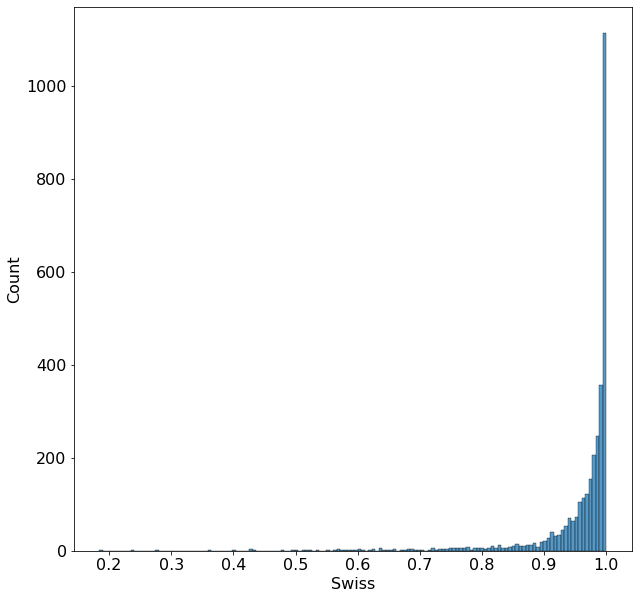

In [19]:
sns.histplot( dfFractions['Swiss'] )

You can see an histogram (light-blue).


The *x-axis* corresponds to the fraction of Swiss people, and the *y-axis* corresponds the **count**, which for the histogram corresponds to the number of values falling in a given *bins* (i.e. a bar of the histogram).

As with any graphical function, you can customize almost everything.
Let's add a density line and change the color :

Text(0.5, 1.0, 'histogram alone')

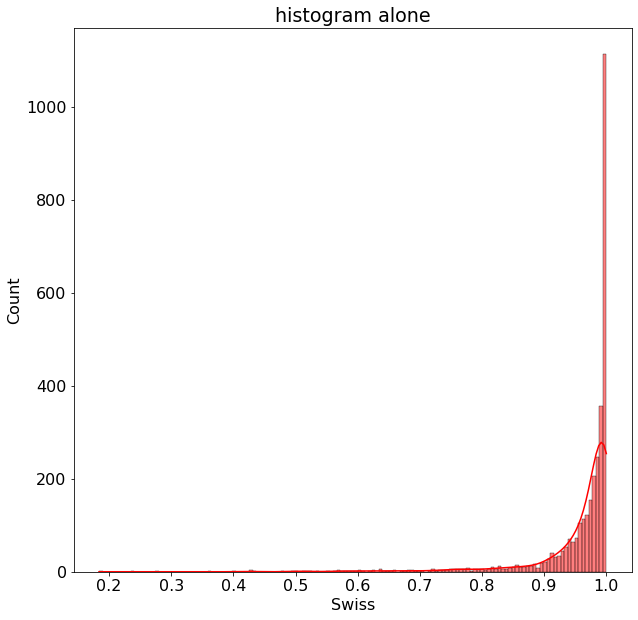

In [20]:
sns.histplot(dfFractions['Swiss'], kde=True , color='red' ).set_title('histogram alone')

> BTW, that is how you set-up colors and add a title on seaborn

**Adding the density line switch the y-axis from count to density.**



A different number of *bins* shows different aspects of the distribution of your data and so it is important to choose one that is appropriate to your sample size and data. 

By default, seaborn automatically infers the number of *bins*. 
You may stick with the original or change it :

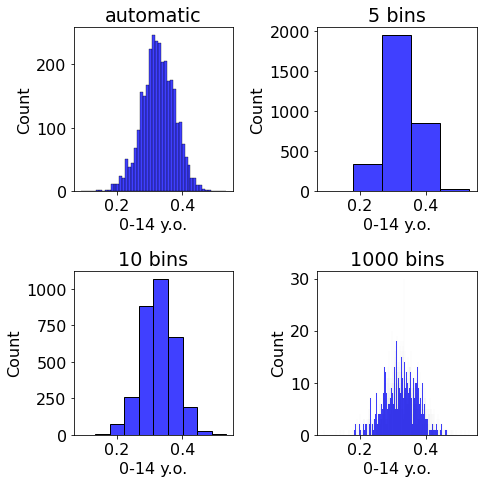

In [21]:
# Set up a figure with multiple panels, here a 2 by 2 grid
f, axes = plt.subplots( 2, 2, figsize=(7, 7) )

# then you can specify where each plot goes on the figure with the ax argument ([0,0] is the top left corner)

# Plot a simple histogram with binsize determined automatically
sns.histplot(dfFractions['0-14 y.o.'], kde=False, color="b", ax=axes[0, 0]).set_title('automatic')

# Plot a simple histogram with binsize 5, 10 , 1000
sns.histplot(dfFractions['0-14 y.o.'], bins=5   , kde=False, color="b", ax=axes[0, 1]).set_title('5 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=10  , kde=False, color="b", ax=axes[1, 0]).set_title('10 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=1000 , kde=False, color="b", ax=axes[1, 1]).set_title('1000 bins')

plt.tight_layout()# this makes the panels margins and setup more graceful

<AxesSubplot:xlabel='Reformed', ylabel='Density'>

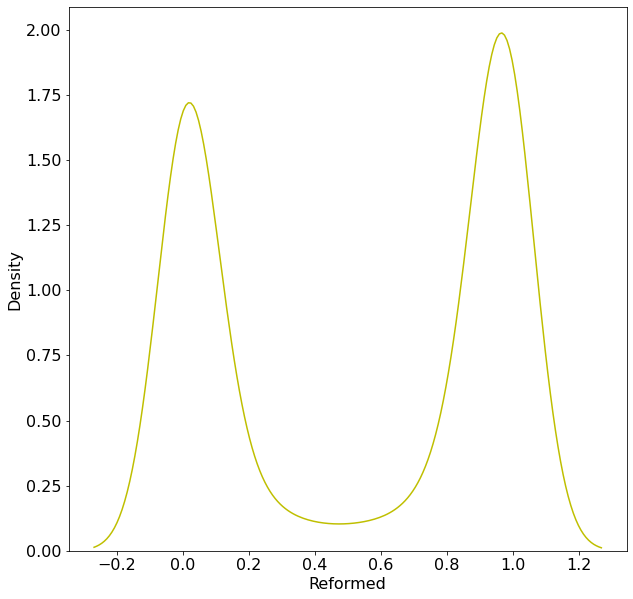

In [22]:
sns.kdeplot(dfFractions['Reformed'], color="y")

Now that we have seen how to represent the distribution of values in a column, let's come back to our summary statistics, in particular the **mean**, the **median** and the **mode**

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Here we just define a small function for plotting a distribution with the mean median and mode 
def plotWithMeanMedianMode( dat , ax):

    mode=dat.mode()[0] #we only select the first mode
    mean=dat.mean()
    median=dat.median()

    sns.histplot( dat , ax=ax , kde=True) # line for histogram and density line

    ax.axvline(mean, color='r', linestyle='--' , label='mean')
    ax.axvline(median, color='g', linestyle='-' , label = "median")
    ax.axvline(mode, color='b', linestyle='-' , label = "mode ")
    ax.legend()

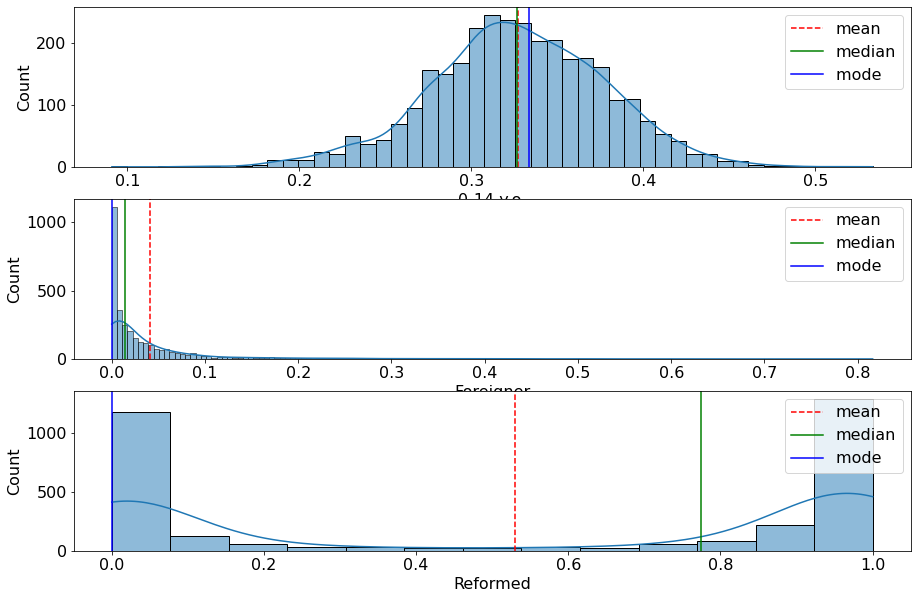

In [24]:
f, axes = plt.subplots( 3, 1, figsize=(15, 10) )

plotWithMeanMedianMode( dfFractions['0-14 y.o.'] , ax=axes[0])
plotWithMeanMedianMode( dfFractions['Foreigner'] , ax=axes[1])
plotWithMeanMedianMode( dfFractions['Reformed'] , ax=axes[2])
plt.show()


[back to the toc](#toc)

<br>

# Exercises 02 - histograms <a id='9'></a>

1. plot the distribution of the total number of habitants. Try to choose an appropriate mode of representation (histogram, density line? number of bins?)
2. try to call `sns.histplot` twice in a row, once with to plot the fraction of Foreigner and the other for the fraction of Swiss. What happens?
3. plot the distribution of the fraction of catholics in the canton of Zurich.

In [56]:
# %load -r 1-7 solutions/solution_01_02.py
# 1. plot the distribution of the total number of habitants. Try to choose an appropriate mode of representation (histogram, density line? number of bins?)

In [59]:
# %load -r 10-14 solutions/solution_01_02.py
# 2. try to call `sns.histplot` twice in a row, once with to plot the fraction of Foreigner and the other for the fraction of Swiss. What happens?

In [62]:
# %load -r 15- solutions/solution_01_02.py
# 3. plot the distribution of the fraction of catholics in the canton of Zurich.

Of course, we have only scratched the surface of this form of representation. You can learn more from the [seaborn official tutorial](https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions)


[back to the toc](#toc)

<br>

## 3.3 accounting for categories in the data  <a id='10'></a>

Being able to show the distribution of the fraction of people aged 14 years old or less for your whole data-set
(here, at national level) is all good, but often we want to compute and represent this information for different categories.
Here the categories would be the canton, but depending on data-sets they could be a genotype (Wild-Type versus KO), sex, experimental condition, ...

Of course, we could manually compute the means and plot an histogram for each category in our data-set, but pandas and seaborn offer much more efficient routines for this.


We will also create a column that describes the main religion and main languague for each town:

In [28]:
dfFractions['majority religion'] = dfFractions.loc[ : , ['Reformed','Catholic','Other'] ].idxmax(axis=1)


dfFractions['majority language'] = dfFractions.loc[ : , ['German speakers', 
                                                         'French speakers',
                                                         'Italian speakers', 
                                                         'Romansche speakers',
                                                         'Non-national tongue speakers'] ].idxmax(axis=1)

In [29]:
dfFractions['majority religion'].head()

0    Reformed
1    Reformed
2    Reformed
3    Reformed
4    Reformed
Name: majority religion, dtype: object

`.idxmax(axis=1)` picks out the column with maximum value for each row.

Computing a summary statistics on a pandas DataFrame is done **using the `df.groupby(...)` method and the applying some function** to the result of that grouping.

In [30]:
grouped = df.groupby('canton name')## grouping by canton
grouped['Total'].sum() ## total number of registered inhabitant for each canton 

canton name
Aargau                              198645
Appenzell Ausserrhoden               51958
Appenzell Innerrhoden                12841
Basel-Landschaft                     59271
Basel-Stadt                          65101
Bern / Berne                        532164
Fribourg / Freiburg                 115400
Genève                              101595
Glarus                               34213
Graubünden / Grigioni / Grischun     94991
Luzern                              134806
Neuchâtel                           103732
Nidwalden                            11992
Obwalden                             15356
Schaffhausen                         38348
Schwyz                               51235
Solothurn                            80424
St. Gallen                          210491
Thurgau                              99552
Ticino                              130777
Uri                                  23694
Valais / Wallis                     100216
Vaud                                238730

In [31]:
dfFractions.groupby('majority language')['Catholic'].mean() ## mean fraction of caholics in towns depending on the majority language

majority language
French speakers       0.467188
German speakers       0.382487
Italian speakers      0.979168
Romansche speakers    0.512879
Name: Catholic, dtype: float64

In [32]:
def getSmallestTown( data ):
    ''' returns the name and population of the town with minimal number of inhabitants '''
    indexsmallestTown = data['Total'].idxmin()
    return data['town name'][indexsmallestTown] , data['Total'][indexsmallestTown]

grouped.apply(getSmallestTown) ## name and population of the town with minimal number of inhabitants for each canton

canton name
Aargau                                     (Gallenkirch, 89)
Appenzell Ausserrhoden                   (Schönengrund, 728)
Appenzell Innerrhoden                       (Schwende, 1233)
Basel-Landschaft                          (Olsberg (BL), 57)
Basel-Stadt                                 (Bettingen, 432)
Bern / Berne                                  (Montvoie, 35)
Fribourg / Freiburg                             (Illens, 17)
Genève                                             (Gy, 207)
Glarus                                    (Leuggelbach, 241)
Graubünden / Grigioni / Grischun                 (Casti, 33)
Luzern                                      (Richensee, 132)
Neuchâtel                                     (Epagnier, 65)
Nidwalden                                    (Emmetten, 638)
Obwalden                                     (Alpnach, 1679)
Schaffhausen                                    (Hofen, 143)
Schwyz                                   (Riemenstalden, 90)
Solothurn   

Computing these summary statistics is all good, but you can also vizualize them using **seaborn master function sns.catplot**


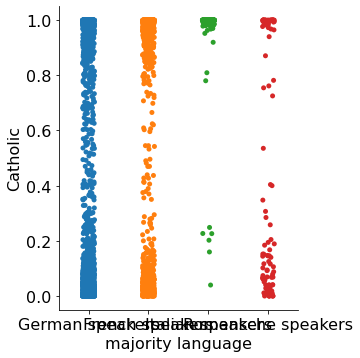

In [33]:
sns.catplot( x = 'majority language' , y='Catholic' ,  data=dfFractions)

The `kind` argument let's you control the overall look of the plot. I
It can be:
* 'strip' : this is the default, showing all data points. 
* **'box'** : the famous boxplot
* **'violin'** : an alternative to the boxplot using density lines
* **'bar'** : the (in)famous barplot
* 'swarm' : similar to 'strip' but with another way of aranging the points
* 'boxen' : some intermediary between a boxplot and a violin plot
* 'point' : alternative to the barplot where only the top point is shown



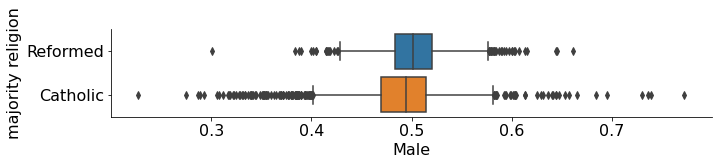

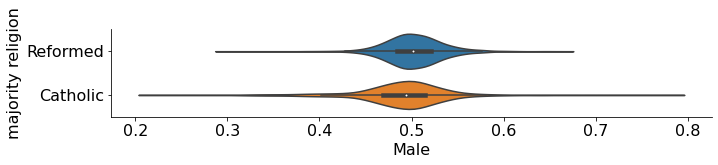

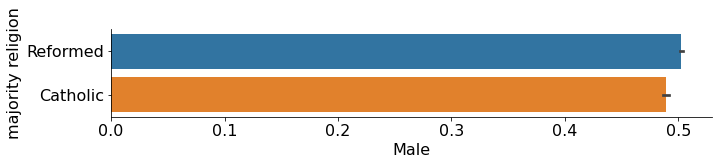

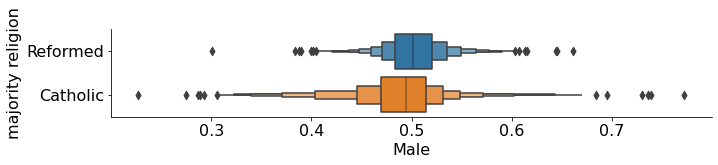

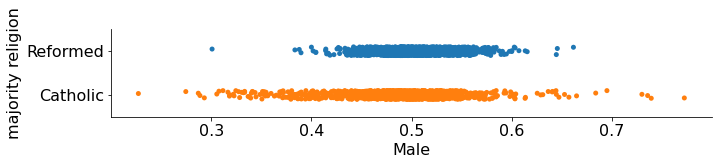

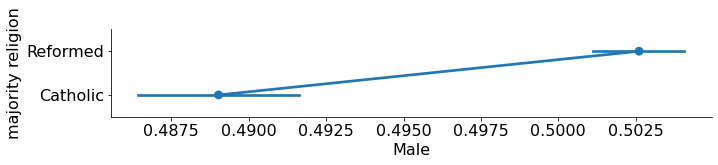

In [34]:
kinds = ['box','violin','bar','boxen','strip','point']#,'swarm'] # swarm takes a long time to compute


for i,k in enumerate(kinds):
    sns.catplot( x = 'Male' , y='majority religion' ,  data=dfFractions , kind = k ,height=2, aspect=5 )

# note 2 arguments here :
# * height : height of the plot
# * aspect : widht/height ratio. -> higher aspect = wider figure

We are going to concentrate on **boxplot**, **violin-plot** and **barplot** as they arguably the more used (and misused) plot encountered in publications.


[back to the toc](#toc)

<br>

### 3.3.1 Boxplots <a id='11'></a>

Boxplots are made of :
* a box : the first, second and third quartile of the data
* whiskers : outliers 

But a picture is worth a thousand words:

![boxplot](images/boxplot.png)

 * Q1/3 : first/third quartile (25%/75% of the data below)
 * IQR : interquartile range : distance between the first and third quartile

While they are very powerful, **boxplot have trouble with multimodal data**

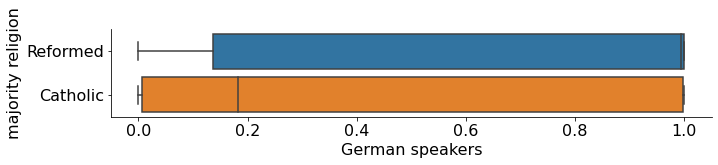

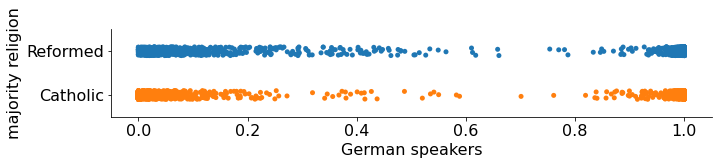

In [35]:
sns.catplot( x = 'German speakers' , y='majority religion' ,  data=dfFractions , kind = 'box' ,height=2, aspect=5 )
sns.catplot( x = 'German speakers' , y='majority religion' ,  data=dfFractions , kind = 'strip' ,height=2, aspect=5 )


[back to the toc](#toc)

<br>

### 3.3.2 violin-plots <a id='12'></a>

These are representations takes boxplots one step further by drawing density lines instead of box and whiskers. 

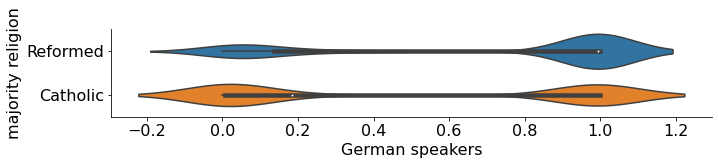

In [36]:
sns.catplot( x = 'German speakers' , y='majority religion' ,  data=dfFractions , kind = 'violin' ,height=2, aspect=5 )

They are generally more versatile than boxplots. 
However, the estimation of the density line means that they work better when the amount of data is large, 
and they give **strange results when the represented values are bounded** (see here, the violin plot show a density for fraction of german speakers under 0 or above 1.0 ...).

You can solve this with the option `cut=0` (IMO they should make that one the default value).

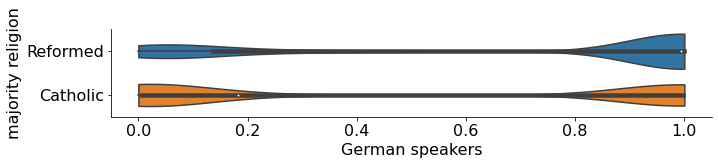

In [37]:
sns.catplot( x = 'German speakers' , y='majority religion' , 
            data=dfFractions , kind = 'violin' ,height=2, aspect=5 , cut=0)


[back to the toc](#toc)

<br>

### 3.3.3 barplots and their error bars <a id='13'></a>

This representation is widely used, but it is, demonstrably, a less than optimal way of representing a distribution. 
At its code, it is a representation of two summary statistics:
* the **mean**, which is the size of the bar
* an **error value** which can be:
    * range : bars extend from smallest to largest value
    * standard deviation ($sigma$): square root of the variance
    * standard error of the mean (SEM): $sem = \frac{\sigma}{\sqrt{n}}$
    * 95% confidence interval (CI): $1.96 * \frac{\sigma}{\sqrt{n}}$

The standard deviation is a measure of the variability in the data, while the **standard error of the mean is a measure of the precision of the estimate of the mean**.

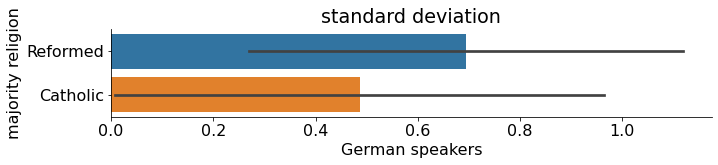

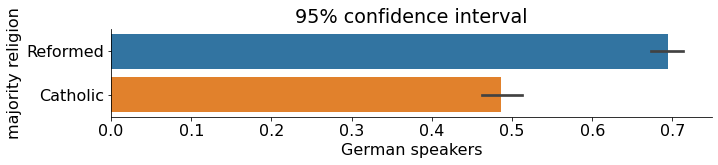

In [38]:
sns.catplot( x = 'German speakers' , y='majority religion' , data=dfFractions , height=2, aspect=5,
            kind = 'bar' , ci='sd').set(title='standard deviation')
sns.catplot( x = 'German speakers' , y='majority religion' , data=dfFractions , height=2, aspect=5,
            kind = 'bar' , ci=95 ).set(title='95% confidence interval')


**You should ALWAYS specify which type of error bar you are using.**


Given all this, one can reasonnably ask the question : **Is there a *best* way ?**

While the answer is not clear about the best way to represent a distribution over multiple categories, we definitely have some good answers regarding bad/misleading ways : 

![barplotnonsense](images/barplotNonsense.png)



From https://stekhoven.shinyapps.io/barplotNonsense/


Barplots :
* Contain the same amount of information as a purely numeric summary (mean ± error)
* **Avoid it if possible**
* Always indicate what type of error bars you are using
* Many articles have been written on the subject of bar charts and possible alternatives, e.g. [a Nature Biomedical Engineering Editorial](https://www.nature.com/articles/s41551-017-0079), [Stret & Gehlenborg (2014)](https://www.nature.com/articles/nmeth.2807), [a Nature Methods Editorial](https://www.nature.com/articles/nmeth.2837), [Drummond & Vowler (2011)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3087125/) and [Weissgerber et al (2015)](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1002128)


[back to the toc](#toc)

<br>

### 3.3.4 showing several categorizations at the same time <a id='14'></a>

`seaborn` offers an easy way to add categories to an existing plot with the `hue` argument:

<AxesSubplot:xlabel='Italian speakers', ylabel='Density'>

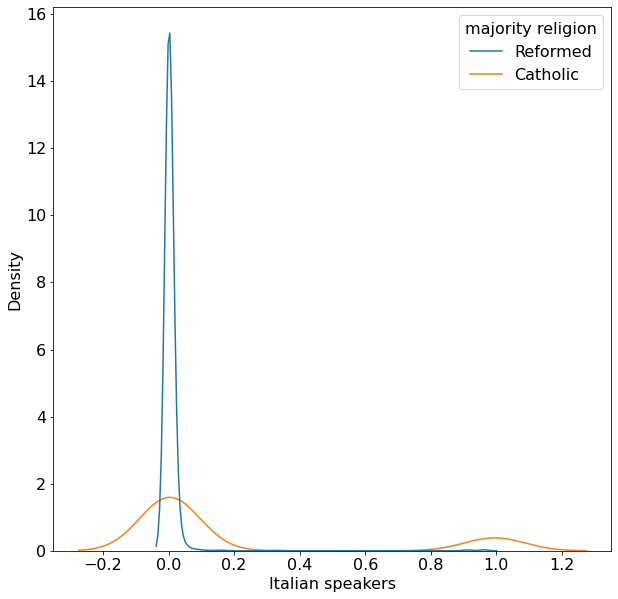

In [39]:
#example with a density line plot

k = 'box' 

category='majority religion'
represented_variable="Italian speakers" 

sns.kdeplot( x = represented_variable , hue= category , # uncomment previous to see the effect of hue
             data=dfFractions  )

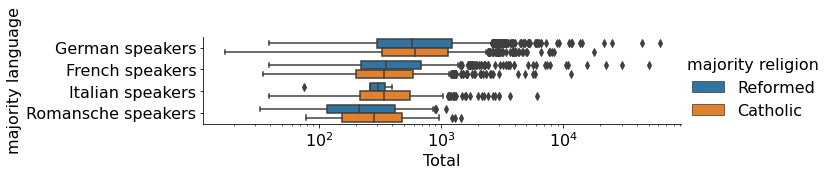

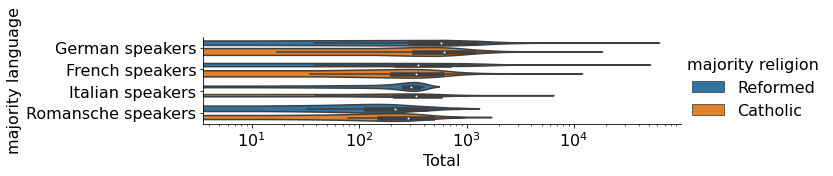

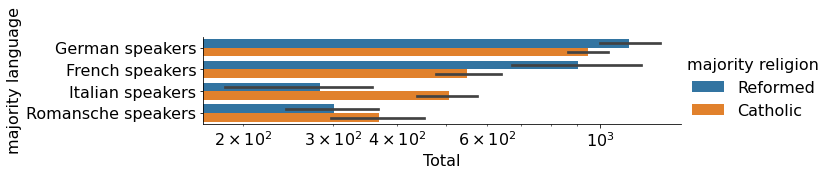

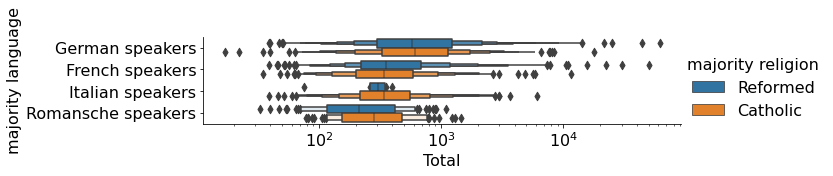

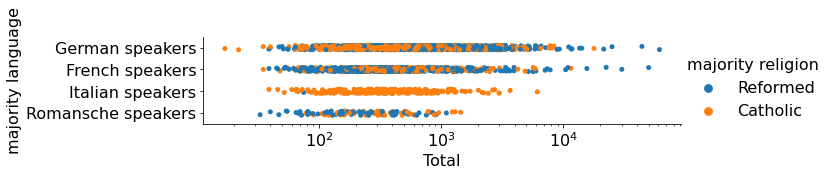

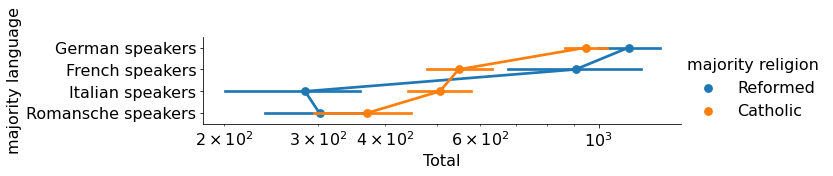

In [40]:
kinds = ['box','violin','bar','boxen','strip','point']#,'swarm'] # swarm takes a long time to compute

categorizations=["majority language","majority religion"]

## uncomment this to switch the categories
#categorizations = categorizations[::-1]

represented_variable="Total" 

for i,k in enumerate(kinds):
    g=sns.catplot( x = represented_variable , y= categorizations[0] , hue= categorizations[1] ,  
                data=dfFractions , kind = k , orient='h',height=2, aspect=5 )
    g.set(xscale="log")



[back to the toc](#toc)

<br>

# Exercise 03 - representing categories <a id='15'></a>

Represent the proportion of people more 60 years old (`'60+ y.o.'`) across all cantons
 Choose the most appropriate kind of plot.

In [67]:
# %load  solutions/solution_01_03.py

# interlude - writing data and plot

To write your data-set to a file, use :

In [42]:
dfFractions.to_csv('data/census1880_fractions.csv')

and for figures :

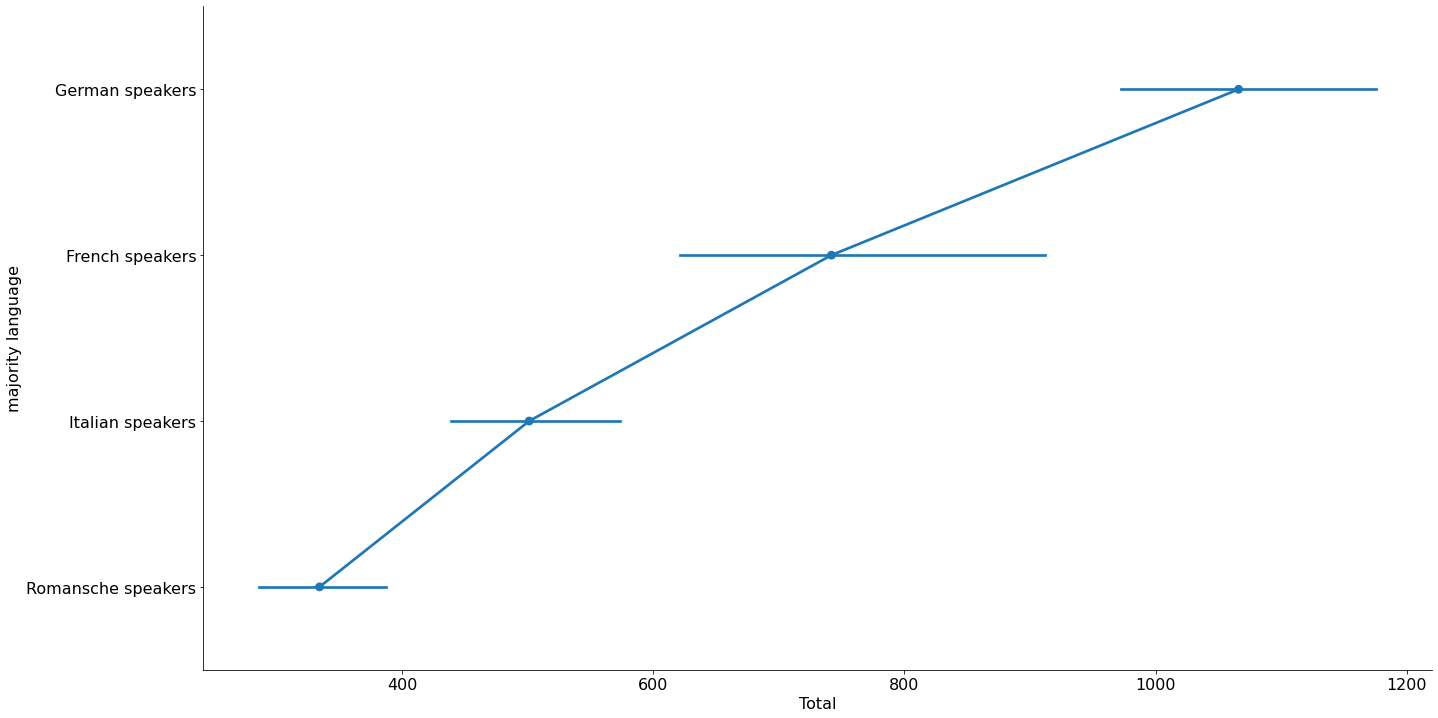

In [43]:
# make you plot as usual, redirect them to a variable
represented_variable , category = 'Total' , 'majority language'
myPlot = sns.catplot( x = represented_variable , y= category ,
             data=dfFractions , kind = k , orient='h',height=10, aspect=2 )

myPlot.savefig("output.png")
# many formats can be specified with the name of the file
# for example : .pdf, .svg, .jpg, ...
# for raster formats, the dpi argument can help define the image quality

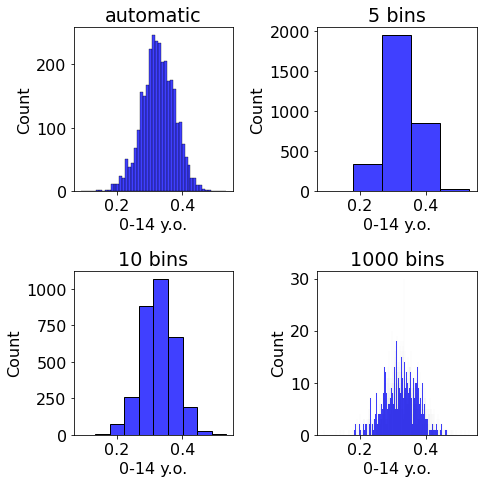

In [44]:
# For multipanel figures :
f, axes = plt.subplots( 2, 2, figsize=(7, 7) )

sns.histplot(dfFractions['0-14 y.o.'], kde=False, color="b", ax=axes[0, 0]).set_title('automatic')
sns.histplot(dfFractions['0-14 y.o.'], bins=5   , kde=False, color="b", ax=axes[0, 1]).set_title('5 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=10  , kde=False, color="b", ax=axes[1, 0]).set_title('10 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=1000 , kde=False, color="b", ax=axes[1, 1]).set_title('1000 bins')
plt.tight_layout()# this makes the panels margins and setup more graceful

f.savefig('output_multipanel.pdf')


[back to the toc](#toc)

<br>

# 4 Additional types of plots and some *caveat* about graphical representations <a id='16'></a>

Graphical representations are instrumental to both support the message we want to convey from our analysis and help us investigate our data. However, not all way of representing data are equal.

[Cleveland et al. 1984](https://info.sice.indiana.edu/~katy/S637-S11/cleveland84.pdf) tested, among others, the capacity of respondent to assess the ratio between different quantities shown of a graph.

![cleveland84_fig3](images/cleveland84_fig3.png)
![cleveland84_fig4](images/cleveland84_fig4.png)


They distinguish:
* **position judgment** : judging using an aligned axis
* **length judgment** : judging using a non aligned axis
* **angle judgment** : judging from angles only

![cleveland84_fig16.png](images/cleveland84_fig16.png)

* **Position judgements are more accurate** than length judgements
* For position judgements, as the distance between the points along an axis perpendicular to the “common scale” increases, the accuracy decreases
* Position judgements are more accurate than angle judgements


**3D pie chart are even worse** as they distort our perception of angles/area.

From the [visually blog](https://visual.ly/blog/2ds-company-3ds-a-crowd/):

![pie_angle](images/pie_angle.png)
![pie_angle](images/pie_angle2.png)

Abuse of these distortions can be seen in [commercial presentation](https://paragraft.wordpress.com/2008/06/03/the-chart-junk-of-steve-jobs/). Be aware of them and avoid misrepresenting your own data.


Here is also another demonstration on how simple can (often) be better :
![pie_to_bar](images/data_visualization_pie_to_bar.gif)